In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm


df = pd.read_csv('measurements_join_eda.csv', sep=';', decimal=',')

df.head()

,MeasurementDateTime,SensorId,ModuleCode,MeasurementInterval,ModuleName,Number of Records,Unit,Value
0,21.06.2020 19:03,602267e77f522d0007fb01cc,Temperature,00:05:00,SHT3X_Temperature,1,°C,21.5625
1,21.06.2020 19:08,602267e77f522d0007fb01cc,Temperature,00:05:00,SHT3X_Temperature,1,°C,21.5625
2,21.06.2020 19:13,602267e77f522d0007fb01cc,Temperature,00:05:00,SHT3X_Temperature,1,°C,21.5625
3,21.06.2020 19:18,602267e77f522d0007fb01cc,Temperature,00:05:00,SHT3X_Temperature,1,°C,21.5625
4,21.06.2020 19:23,602267e77f522d0007fb01cc,Temperature,00:05:00,SHT3X_Temperature,1,°C,21.5625


In [3]:
# Pętla, która tworzy krótki raport dotyczący odrębnych oraz pustych wartości i dla każdej z kolumn.
for col in df.columns:
    print('Column name:', col)
    print('\t Count of distinct values: ', len(df[col].unique()))
    print('\t Has null: ', df[col].isnull().values.any())
    if len(df[col].unique()) < 10:
        print('\t Distinct Values in column', df[col].unique())
    print()

Column name: MeasurementDateTime
	 Count of distinct values:  46683
	 Has null:  False

Column name: SensorId
	 Count of distinct values:  25
	 Has null:  False

Column name: ModuleCode
	 Count of distinct values:  6
	 Has null:  False
	 Distinct Values in column ['Temperature' 'VOC' 'Light' 'Humidity' 'Acceleration' 'Pressure']

Column name: MeasurementInterval
	 Count of distinct values:  2
	 Has null:  False
	 Distinct Values in column ['00:05:00' '00:10:00']

Column name: ModuleName
	 Count of distinct values:  6
	 Has null:  False
	 Distinct Values in column ['SHT3X_Temperature' 'BME680_VOC' 'ISL29035_Light' 'SHT3X_Humidity'
 'LIS2DH_Acceleration' 'BME680_Pressure']

Column name: Number of Records
	 Count of distinct values:  1
	 Has null:  False
	 Distinct Values in column [1]

Column name: Unit
	 Count of distinct values:  6
	 Has null:  False
	 Distinct Values in column ['°C' 'Ohm' 'Lux' '%' 'm/s²' 'hPa']

Column name: Value
	 Count of distinct values:  938
	 Has null:  False



In [4]:
# - Tabela nie zawiera żadnych NULL wartości.
# - Kolumny "ModuleCode", "ModuleName", "Unit" zawierają dokładnie tyle samo odrębnych wartości. Bazując na tej informacji oraz obserwacji części tabeli, 
#   możemy założyć, że przedstawiają one tę samą informację. Możemy pozbyć się dwóch z trzech kolumn.
# - Kolumna "Number of Records" nie dostarcza żadnej wartościowej informacji.
# - Kolumny "MeasurementDateTime" oraz "MeasurementInterval" mogą również być uznane, za takie, które przedstawiają tę samą informację.

In [5]:
# Pozbywamy się niepotrzebnych kolumn.
df.drop(['Number of Records', 'ModuleCode', 'ModuleName', 'MeasurementInterval'], inplace=True, axis=1)
df.head()

,MeasurementDateTime,SensorId,Unit,Value
0,21.06.2020 19:03,602267e77f522d0007fb01cc,°C,21.5625
1,21.06.2020 19:08,602267e77f522d0007fb01cc,°C,21.5625
2,21.06.2020 19:13,602267e77f522d0007fb01cc,°C,21.5625
3,21.06.2020 19:18,602267e77f522d0007fb01cc,°C,21.5625
4,21.06.2020 19:23,602267e77f522d0007fb01cc,°C,21.5625


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468953 entries, 0 to 468952
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MeasurementDateTime  468953 non-null  object 
 1   SensorId             468953 non-null  object 
 2   Unit                 468953 non-null  object 
 3   Value                468953 non-null  float64
dtypes: float64(1), object(3)
memory usage: 14.3+ MB


In [7]:
# W tym kroku chcemy zmienić typ danych w kolumnie "MeasurementDateTime" z obiektowych na datowe oraz posortować tabelę, aby zapisy z sensorów zaczynały się od najstarszej daty.
df['MeasurementDateTime'] = pd.to_datetime(df['MeasurementDateTime'], dayfirst=True)
df = df.sort_values(by='MeasurementDateTime')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468953 entries, 343551 to 1192
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   MeasurementDateTime  468953 non-null  datetime64[ns]
 1   SensorId             468953 non-null  object        
 2   Unit                 468953 non-null  object        
 3   Value                468953 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 17.9+ MB


,MeasurementDateTime,SensorId,Unit,Value
343551,2020-06-07 12:59:00,602267e87f522d0007fb01e6,Lux,0.000000
340979,2020-06-07 12:59:00,602267e87f522d0007fb01e6,hPa,236.355896
351243,2020-06-07 12:59:00,602267e87f522d0007fb01e6,%,98.669998
351767,2020-06-07 12:59:00,602267e87f522d0007fb01e6,°C,2.500000
289563,2020-06-07 13:00:00,602267e87f522d0007fb01e3,%,33.930000


In [8]:
# W naszej pracy chcemy jedynie przewidzieć zmianę temperatury podczas przewozu.
# W związku z tym interesują nas jedynie recordy, dla których widnieje "°C" w kolumnie "Unit".

df_temp = df.loc[df.Unit == '°C']
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123871 entries, 351767 to 1768
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   MeasurementDateTime  123871 non-null  datetime64[ns]
 1   SensorId             123871 non-null  object        
 2   Unit                 123871 non-null  object        
 3   Value                123871 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.7+ MB


In [9]:
# Spośród 468953 recordów, 123871 dotyczy zapisów temperatury.
# Sprawdzamy średnią zarejestrowaną temperaturę dla każdego z 25 sensorów.
df_temp_group = df_temp.groupby(['SensorId']).mean()
print(df_temp_group)

                              Value
SensorId                           
602267e77f522d0007fb01ca   4.932607
602267e77f522d0007fb01cb   4.931107
602267e77f522d0007fb01cc  20.935456
602267e77f522d0007fb01cd   4.935001
602267e77f522d0007fb01ce   4.834896
602267e77f522d0007fb01cf   4.132562
602267e77f522d0007fb01d0   3.962662
602267e77f522d0007fb01d1   1.999463
602267e77f522d0007fb01d2  16.007420
602267e77f522d0007fb01d3  20.920984
602267e77f522d0007fb01d5   1.876689
602267e87f522d0007fb01d6  20.091500
602267e87f522d0007fb01d7   2.152099
602267e87f522d0007fb01d8   2.353918
602267e87f522d0007fb01da  20.045310
602267e87f522d0007fb01db  19.908002
602267e87f522d0007fb01dc   2.542276
602267e87f522d0007fb01dd   3.175481
602267e87f522d0007fb01df  -2.406760
602267e87f522d0007fb01e1  -2.208603
602267e87f522d0007fb01e2  20.627365
602267e87f522d0007fb01e3  20.610280
602267e87f522d0007fb01e4  -1.355914
602267e87f522d0007fb01e6  -3.767295
602267e87f522d0007fb01e7  23.161892


In [10]:
# Od razu możemy zauważyć, że średnie temperatur wiekszości sensorów waha się od -4 do 5 stopni Celcjusza.
# Jest jednak 9 sensorów, dla których średnia temperatura wynosi ponad 15 stopni Celcjusza.
# Możemy założyć, że dane sensory rejestrowały temperaturę, podczas przejazdy z wyłączoną chłodziarką.

df_temp = df_temp[~df_temp['SensorId'].isin(['602267e77f522d0007fb01cc', '602267e77f522d0007fb01d2', '602267e77f522d0007fb01d3', '602267e87f522d0007fb01d6', '602267e87f522d0007fb01da', '602267e87f522d0007fb01db', '602267e87f522d0007fb01e2', '602267e87f522d0007fb01e3', '602267e87f522d0007fb01e7'])]
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77968 entries, 351767 to 468952
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   MeasurementDateTime  77968 non-null  datetime64[ns]
 1   SensorId             77968 non-null  object        
 2   Unit                 77968 non-null  object        
 3   Value                77968 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.0+ MB


In [11]:
# Z 123871 zapisów, zostało 77968.
# Posortowanej tabeli (po dacie) nadajemy nowe indexy.
df_temp = df_temp.reset_index()
df_temp.drop('index', axis=1, inplace=True)
df_temp.head()

,MeasurementDateTime,SensorId,Unit,Value
0,2020-06-07 12:59:00,602267e87f522d0007fb01e6,°C,2.5000
1,2020-06-07 13:01:00,602267e87f522d0007fb01e4,°C,3.1250
2,2020-06-07 13:02:00,602267e77f522d0007fb01d1,°C,1.8750
3,2020-06-07 13:02:00,602267e77f522d0007fb01d0,°C,3.1250
4,2020-06-07 13:03:00,602267e77f522d0007fb01d5,°C,3.4375


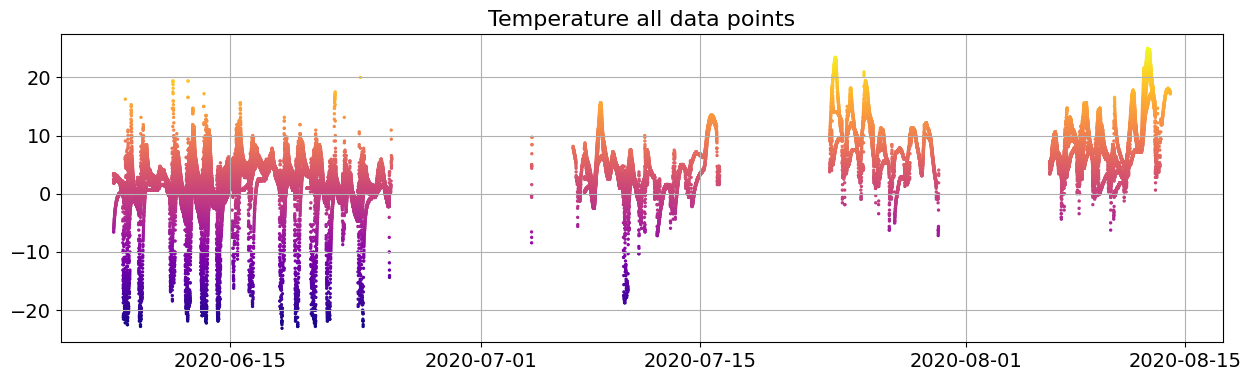

In [12]:
#Zwizualizujmy sobie zmianę temperatury w czasie
plt.figure(figsize=(15, 4))
plt.title("Temperature all data points", fontsize=16)
plt.scatter(df_temp['MeasurementDateTime'], df_temp['Value'], c = df_temp['Value'], cmap = 'plasma', s = 2, lw=1)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

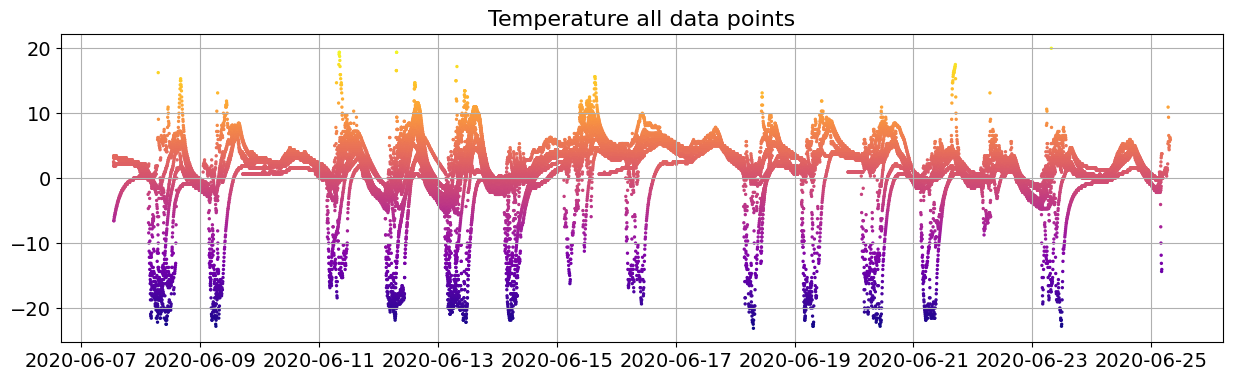

In [13]:
# Widać, 4 okresy użytkowania. W naszym przypadku do analizy uwzględnimy tylko
# pierwszy okres użytkowania, gdyż mamy pewność, że przewożony był towar mrożony
# i prawidłowa temperatura powinna być poniżej 0 stopni celcjusza.
df_temp = df_temp[df_temp['MeasurementDateTime'] < '2020-07-01']
plt.figure(figsize=(15, 4))
plt.title("Temperature all data points", fontsize=16)
plt.scatter(df_temp['MeasurementDateTime'], df_temp['Value'], c = df_temp['Value'], cmap = 'plasma', s = 2, lw = 1)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

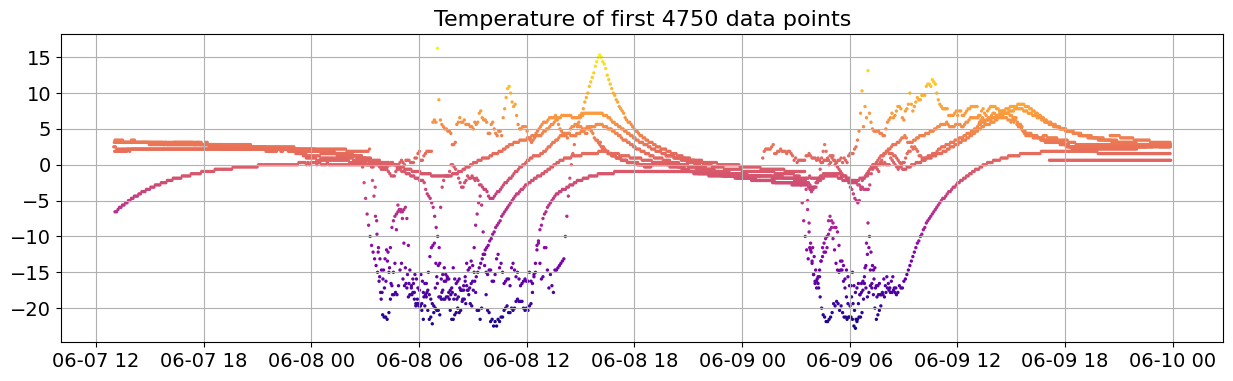

In [14]:
Tp = 4750
plt.figure(figsize=(15, 4))
plt.title("Temperature of first {} data points".format(Tp), fontsize=16)
plt.scatter(df_temp['MeasurementDateTime'][:Tp], df_temp['Value'][:Tp], c = df_temp['Value'][:Tp], cmap = 'plasma', s = 2, lw=1)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [15]:
a = len(df[df['Value'] > 0])
print(f'Zarejestrowano {a} nieprawidłowych temperatur (powyżej 0).')

Zarejestrowano 327283 nieprawidłowych temperatur (powyżej 0).


In [32]:
df_hum = df.loc[df.Unit == '%']
df_hum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97133 entries, 351243 to 1480
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   MeasurementDateTime  97133 non-null  datetime64[ns]
 1   SensorId             97133 non-null  object        
 2   Unit                 97133 non-null  object        
 3   Value                97133 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.7+ MB


In [17]:
df_hum_group = df_hum.groupby(['SensorId']).mean()
print(df_hum_group)

                              Value
SensorId                           
602267e77f522d0007fb01ca  85.074490
602267e77f522d0007fb01cb  81.510436
602267e77f522d0007fb01cc  30.961556
602267e77f522d0007fb01cd  77.808280
602267e77f522d0007fb01ce  78.984658
602267e77f522d0007fb01cf  77.777028
602267e77f522d0007fb01d0  73.450989
602267e77f522d0007fb01d1  74.316431
602267e77f522d0007fb01d2  67.012326
602267e77f522d0007fb01d3  30.189449
602267e87f522d0007fb01df  82.938846
602267e87f522d0007fb01e1  92.752230
602267e87f522d0007fb01e2  31.220814
602267e87f522d0007fb01e3  30.724314
602267e87f522d0007fb01e4  90.101383
602267e87f522d0007fb01e6  89.319674
602267e87f522d0007fb01e7  38.344582


In [18]:
df_hum = df_hum[~df_hum['SensorId'].isin(['602267e77f522d0007fb01cc', '602267e77f522d0007fb01d3', '602267e87f522d0007fb01e2', '602267e87f522d0007fb01e3', '602267e87f522d0007fb01e7'])]
df_hum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65301 entries, 351243 to 468776
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   MeasurementDateTime  65301 non-null  datetime64[ns]
 1   SensorId             65301 non-null  object        
 2   Unit                 65301 non-null  object        
 3   Value                65301 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.5+ MB


In [19]:
df_hum = df_hum.reset_index()
df_hum.drop('index', axis=1, inplace=True)
df_hum.head()

,MeasurementDateTime,SensorId,Unit,Value
0,2020-06-07 12:59:00,602267e87f522d0007fb01e6,%,98.669998
1,2020-06-07 13:01:00,602267e87f522d0007fb01e4,%,83.459999
2,2020-06-07 13:01:00,602267e77f522d0007fb01d2,%,60.059998
3,2020-06-07 13:02:00,602267e77f522d0007fb01d0,%,65.909996
4,2020-06-07 13:02:00,602267e77f522d0007fb01d1,%,72.540001


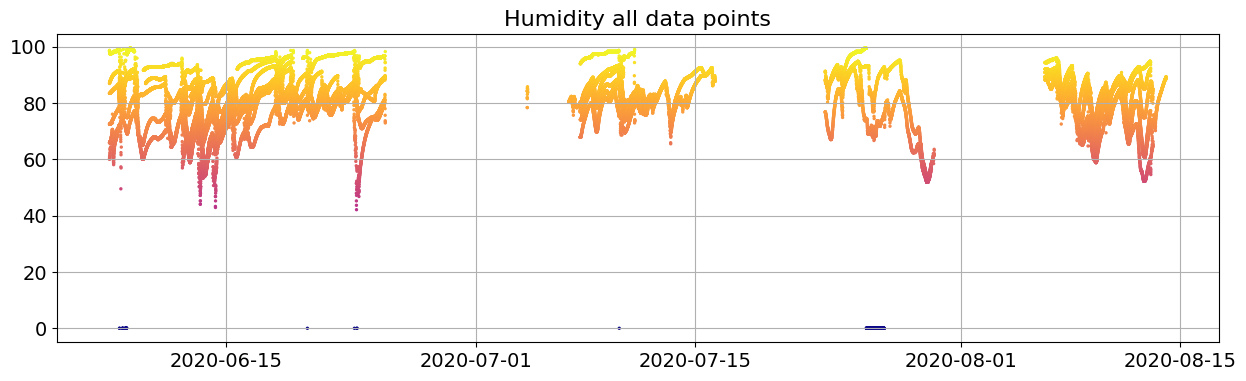

In [20]:
#Zwizualizujmy sobie zmianę temperatury w czasie
plt.figure(figsize=(15, 4))
plt.title("Humidity all data points", fontsize=16)
plt.scatter(df_hum['MeasurementDateTime'], df_hum['Value'], c = df_hum['Value'], cmap = 'plasma', s = 2, lw=1)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

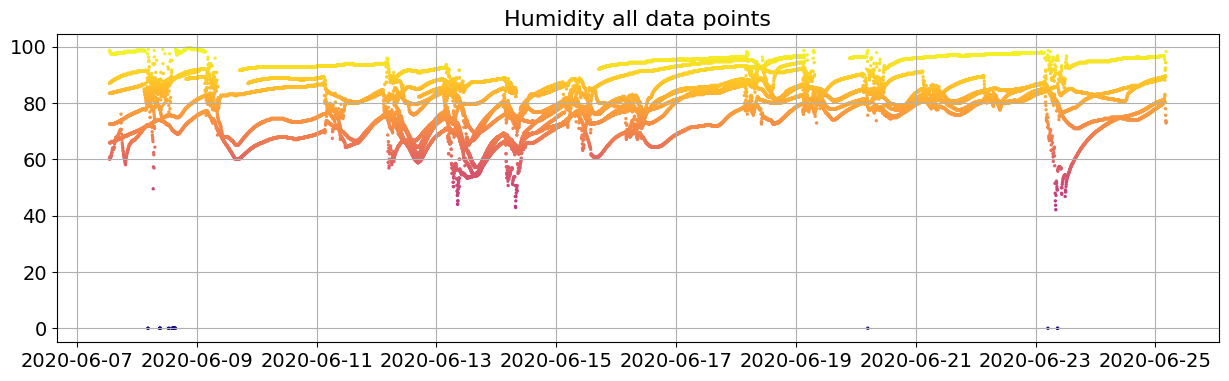

In [21]:
df_hum = df_hum[df_hum['MeasurementDateTime'] < '2020-07-01']

plt.figure(figsize=(15, 4))
plt.title("Humidity all data points", fontsize=16)
plt.scatter(df_hum['MeasurementDateTime'], df_hum['Value'], c = df_hum['Value'], cmap = 'plasma', s = 2, lw = 1)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

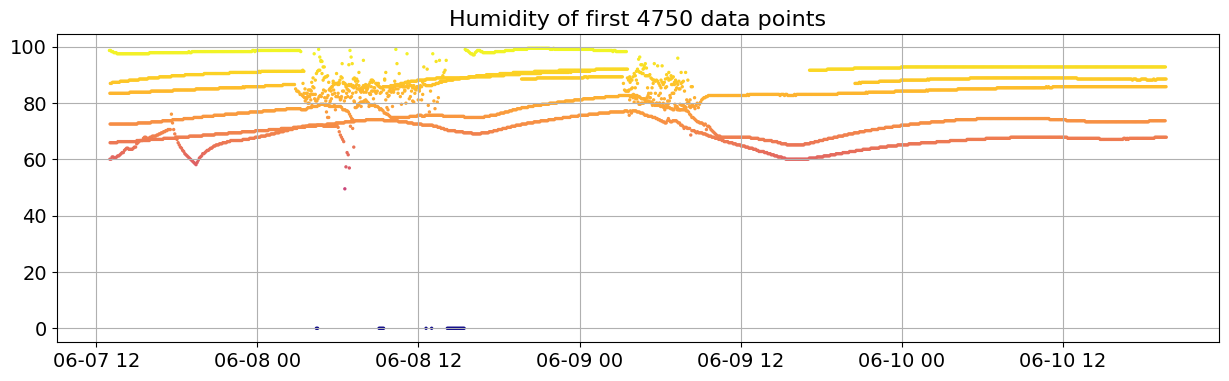

In [22]:
Tp = 4750
plt.figure(figsize=(15, 4))
plt.title("Humidity of first {} data points".format(Tp), fontsize=16)
plt.scatter(df_hum['MeasurementDateTime'][:Tp], df_hum['Value'][:Tp], c = df_hum['Value'][:Tp], cmap = 'plasma', s = 2, lw=1)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [23]:
df_lux = df.loc[df.Unit == 'Lux']
df_lux

,MeasurementDateTime,SensorId,Unit,Value
343551,2020-06-07 12:59:00,602267e87f522d0007fb01e6,Lux,0.000000
289447,2020-06-07 13:00:00,602267e87f522d0007fb01e3,Lux,0.000000
256915,2020-06-07 13:00:00,602267e87f522d0007fb01e2,Lux,0.000000
74312,2020-06-07 13:01:00,602267e77f522d0007fb01d3,Lux,17.039999
71490,2020-06-07 13:01:00,602267e77f522d0007fb01d2,Lux,61.199997
...,...,...,...,...
1188,2020-09-14 05:56:00,602267e87f522d0007fb01e7,Lux,0.000000
1189,2020-09-14 06:01:00,602267e87f522d0007fb01e7,Lux,0.000000
1190,2020-09-14 06:06:00,602267e87f522d0007fb01e7,Lux,0.000000
1191,2020-09-14 06:11:00,602267e87f522d0007fb01e7,Lux,0.000000


In [24]:
df_lux_group = df_lux.groupby(['SensorId']).mean()
print(df_lux_group)

                              Value
SensorId                           
602267e77f522d0007fb01ca   1.707234
602267e77f522d0007fb01cb   1.666969
602267e77f522d0007fb01cc   1.204482
602267e77f522d0007fb01cd   0.544603
602267e77f522d0007fb01ce   0.591245
602267e77f522d0007fb01cf   0.411700
602267e77f522d0007fb01d0   0.724208
602267e77f522d0007fb01d1   0.956370
602267e77f522d0007fb01d2  13.119999
602267e77f522d0007fb01d3   5.964296
602267e77f522d0007fb01d5   2.008216
602267e87f522d0007fb01d6   8.368784
602267e87f522d0007fb01d7  15.472803
602267e87f522d0007fb01d8  15.767505
602267e87f522d0007fb01da   1.848674
602267e87f522d0007fb01db   8.358942
602267e87f522d0007fb01dc  21.288149
602267e87f522d0007fb01dd  11.997642
602267e87f522d0007fb01df   0.109870
602267e87f522d0007fb01e1   0.020666
602267e87f522d0007fb01e2   0.077108
602267e87f522d0007fb01e3   0.000000
602267e87f522d0007fb01e4   0.161315
602267e87f522d0007fb01e6   0.528550
602267e87f522d0007fb01e7   0.000000


In [25]:
df_lux = df_lux[~df_lux['SensorId'].isin(['602267e77f522d0007fb01d2', '602267e87f522d0007fb01d7', '602267e87f522d0007fb01d8', '602267e87f522d0007fb01dc', '602267e87f522d0007fb01dd'])]
df_lux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111277 entries, 343551 to 1192
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   MeasurementDateTime  111277 non-null  datetime64[ns]
 1   SensorId             111277 non-null  object        
 2   Unit                 111277 non-null  object        
 3   Value                111277 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


In [26]:
df_lux = df_lux.reset_index()
df_lux.drop('index', axis=1, inplace=True)
df_lux.head()

,MeasurementDateTime,SensorId,Unit,Value
0,2020-06-07 12:59:00,602267e87f522d0007fb01e6,Lux,0.000000
1,2020-06-07 13:00:00,602267e87f522d0007fb01e3,Lux,0.000000
2,2020-06-07 13:00:00,602267e87f522d0007fb01e2,Lux,0.000000
3,2020-06-07 13:01:00,602267e77f522d0007fb01d3,Lux,17.039999
4,2020-06-07 13:01:00,602267e87f522d0007fb01db,Lux,23.519999


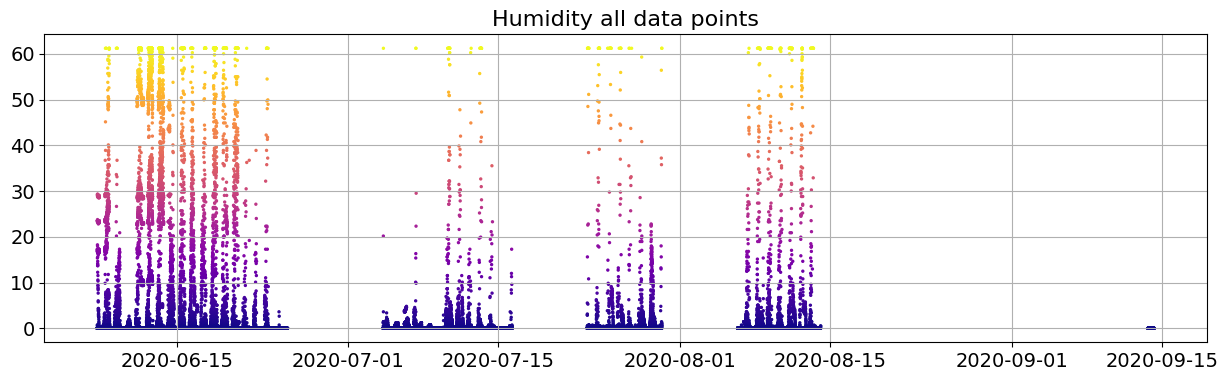

In [27]:
#Zwizualizujmy sobie zmianę temperatury w czasie
plt.figure(figsize=(15, 4))
plt.title("Humidity all data points", fontsize=16)
plt.scatter(df_lux['MeasurementDateTime'], df_lux['Value'], c = df_lux['Value'], cmap = 'plasma', s = 2, lw=1)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

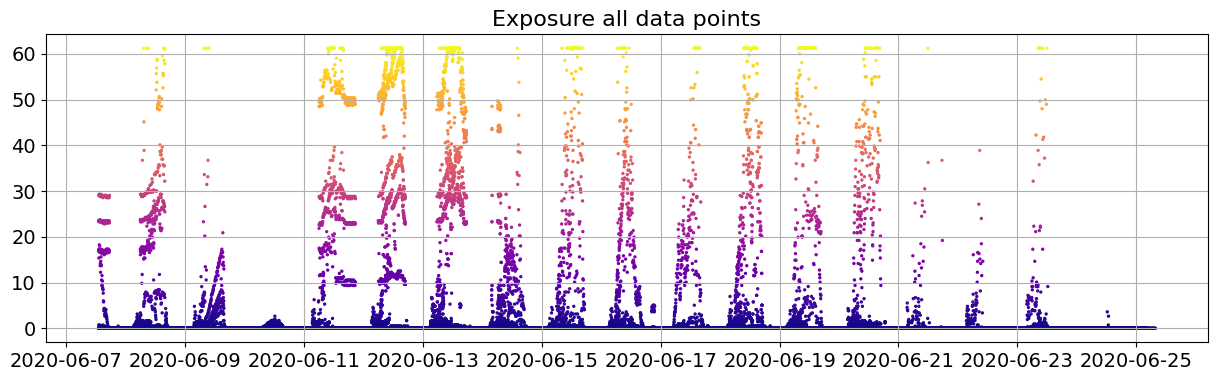

In [28]:
df_lux = df_lux[df_lux['MeasurementDateTime'] < '2020-07-01']

plt.figure(figsize=(15, 4))
plt.title("Exposure all data points", fontsize=16)
plt.scatter(df_lux['MeasurementDateTime'], df_lux['Value'], c = df_lux['Value'], cmap = 'plasma', s = 2, lw = 1)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

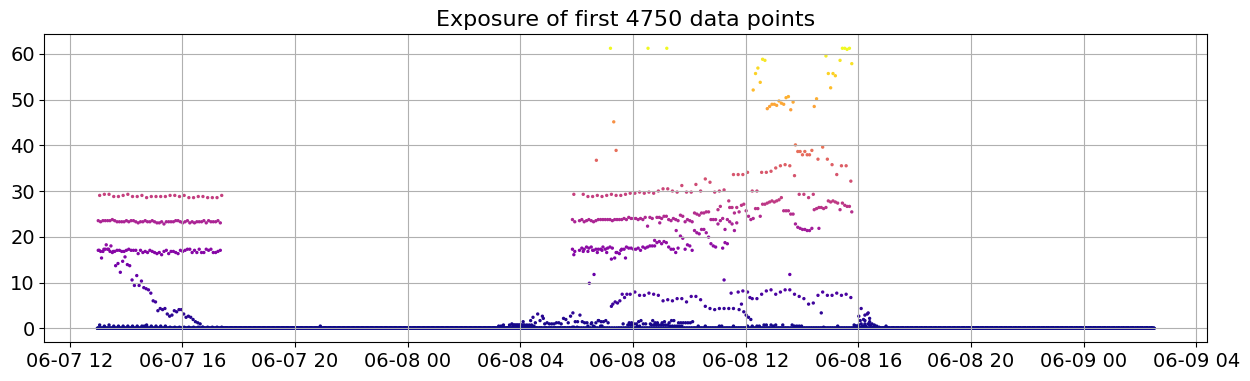

In [29]:
Tp = 4750
plt.figure(figsize=(15, 4))
plt.title("Exposure of first {} data points".format(Tp), fontsize=16)
plt.scatter(df_lux['MeasurementDateTime'][:Tp], df_lux['Value'][:Tp], c = df_lux['Value'][:Tp], cmap = 'plasma', s = 2, lw=1)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()